###### tables me kuch data bht large hta jesy k 1000000000 , kuch low hta like 0, 1 , jb model train krty tou ML algorithms large data ko dominant kr deta aur low ko neglect kr deta , isi liye hm feature scailing krty js me hm dono data ko same levels pr laty hain. , data ki nature pr affect nhi hta ,, its like aik bara apple aur aik chota  tou hmne bary ko b compress kr k chota krna hy 

#### There are 2 Feature  scaling techniques
###### 1 - Standardization
###### 2 - Normalization


##### Xnew  = (Xi - Xmean)/std

###### Feature scaling dose not remove outliers , just lessen their magnitude

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df  = pd.read_csv("loan.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Scaling through Scikit_learn

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [23]:
ss.fit(df[["ApplicantIncome"]])

StandardScaler()

In [25]:
df["ApplicantIncome_ss"] =pd.DataFrame(ss.transform(df[["ApplicantIncome"]]), columns=['x'])

In [26]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,0.072991,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,6.140000e+02,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,-4.339634e-18,1621.245798,146.412162,342.00000,0.842199,-1.735854e-17
std,1.000815e+00,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,-8.606493e-01,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,-4.138159e-01,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,-2.606393e-01,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,6.414426e-02,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,1.238462e+01,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\ML\AppData\Local\Temp\ipykernel_20096\4067803824.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ApplicantIncome"])
C:\Users\ML\AppData\Local\Temp\ipykernel_20096\4067803824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ApplicantIncome_ss"])


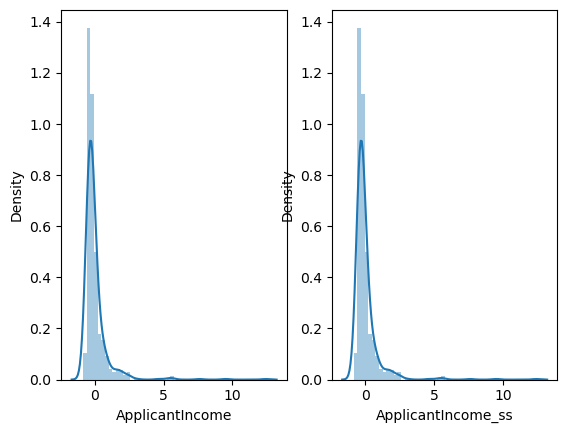

In [30]:
plt.subplot(1,2,1)
sns.distplot(df["ApplicantIncome"]) # values in 1000
plt.subplot(1, 2, 2)
sns.distplot(df["ApplicantIncome_ss"]) # 5, 10 
plt.show()
# nature remains same just magnitude lessen